In [1]:
import torch
from matplotlib import pyplot as plt

from flux_utils import decode_imgs
from diffusers import AutoencoderKL, FluxPipeline

weight_dtype = torch.bfloat16

/root/miniconda3/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/root/miniconda3/lib/python3.10/site-packages/torchvision/image.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [2]:
vae = AutoencoderKL.from_pretrained(
        "/root/autodl-tmp/FLUX-dev",
        subfolder="vae",
        torch_dtype=weight_dtype,
    )

vae.requires_grad_(False)
vae.eval().to("cuda")

AutoencoderKL(
  (encoder): Encoder(
    (conv_in): Conv2d(3, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (down_blocks): ModuleList(
      (0): DownEncoderBlock2D(
        (resnets): ModuleList(
          (0-1): 2 x ResnetBlock2D(
            (norm1): GroupNorm(32, 128, eps=1e-06, affine=True)
            (conv1): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
            (norm2): GroupNorm(32, 128, eps=1e-06, affine=True)
            (dropout): Dropout(p=0.0, inplace=False)
            (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
            (nonlinearity): SiLU()
          )
        )
        (downsamplers): ModuleList(
          (0): Downsample2D(
            (conv): Conv2d(128, 128, kernel_size=(3, 3), stride=(2, 2))
          )
        )
      )
      (1): DownEncoderBlock2D(
        (resnets): ModuleList(
          (0): ResnetBlock2D(
            (norm1): GroupNorm(32, 128, eps=1e-06, affine=True)
            (c

In [3]:
pipeline = FluxPipeline(
        scheduler=None,
        tokenizer=None,
        text_encoder=None,
        tokenizer_2=None,
        text_encoder_2=None,
        vae=vae,
        transformer=None,
    ).to(weight_dtype).to("cuda")

/tmp/ipykernel_10239/3172469430.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  latents = torch.load("/root/autodl-tmp/data/1rf-dog/z_1/z_1_00057.pt").to(weight_dtype).t

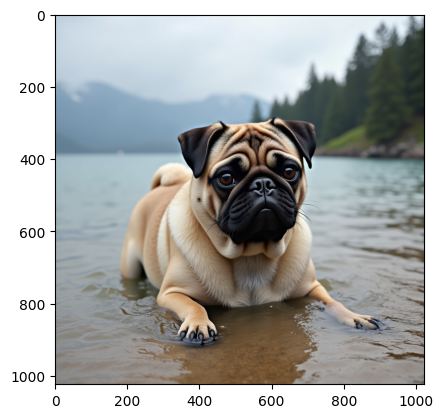

In [4]:
latents = torch.load("/root/autodl-tmp/data/1rf-dog/z_1/z_1_00057.pt").to(weight_dtype).to("cuda")

img = decode_imgs(latents, vae, pipeline)

plt.imshow(img[0])